In [3]:
!pip install plotly
from scipy.io import loadmat
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.axes_style('whitegrid');
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = loadmat('Salinas_corrected.mat')['salinas_corrected']
y = loadmat('Salinas_gt.mat')['salinas_gt']
xs = x.shape
ys = y.shape
xs

(512, 217, 204)

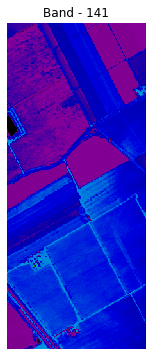

In [4]:
fig = plt.figure(figsize = (12, 6))
q = np.random.randint(x.shape[2])
plt.imshow(x[:,:,q], cmap='nipy_spectral')
plt.axis('off')
plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

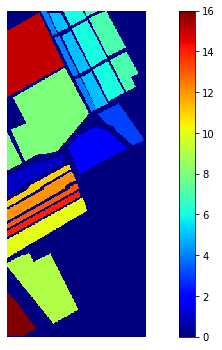

In [5]:
plt.figure(figsize=(12,6))
plt.imshow(y,cmap='jet')
plt.colorbar()
plt.axis('off')
plt.show()

In [6]:


def extract_pixels(x, y):
  q = x.reshape(-1, x.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+x.shape[2])]+['class']
  df.to_csv('hsi.csv')
  return df
  
df = extract_pixels(x, y)



In [7]:
df2 = pd.read_csv('hsi.csv')
del df2['Unnamed: 0']
df2['class']

0         0
1         0
2         0
3         0
4         0
         ..
111099    0
111100    0
111101    0
111102    0
111103    0
Name: class, Length: 111104, dtype: int64

In [9]:
df2.iloc[:,:-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band195,band196,band197,band198,band199,band200,band201,band202,band203,band204
count,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,...,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000,111104.000000
mean,372.181929,480.388321,693.751287,1156.562923,1462.129950,1533.406025,1473.193944,1634.795552,1866.721801,1930.824417,...,132.158959,116.093219,138.739181,117.048180,71.937059,104.474825,71.262025,39.304778,14.063463,22.294175
std,62.453906,80.614130,103.217542,170.676450,227.876068,260.417860,271.714302,329.998481,404.351771,445.485781,...,71.227778,63.216203,76.108928,65.012702,40.255958,59.222728,41.232828,23.280864,9.088472,13.735217
min,87.000000,86.000000,90.000000,86.000000,91.000000,91.000000,88.000000,88.000000,87.000000,86.000000,...,-3.000000,-6.000000,-2.000000,-7.000000,-5.000000,-3.000000,-6.000000,-9.000000,-8.000000,-11.000000
25%,308.000000,404.000000,604.000000,1005.000000,1260.000000,1305.000000,1240.000000,1348.000000,1514.000000,1540.000000,...,64.000000,55.000000,65.000000,55.000000,33.000000,47.000000,32.000000,18.000000,7.000000,10.000000
50%,372.000000,482.000000,721.000000,1174.000000,1496.000000,1560.000000,1512.000000,1691.000000,1936.000000,2007.000000,...,143.000000,126.000000,150.000000,127.000000,78.000000,113.000000,76.000000,42.000000,15.000000,23.000000
75%,435.000000,558.000000,745.000000,1267.000000,1617.000000,1715.000000,1664.000000,1873.000000,2157.000000,2255.000000,...,197.000000,174.000000,209.000000,177.000000,109.000000,159.000000,108.000000,60.000000,21.000000,33.000000
max,814.000000,1165.000000,1920.000000,3865.000000,5153.000000,5614.000000,5663.000000,6599.000000,7748.000000,8209.000000,...,569.000000,504.000000,608.000000,523.000000,596.000000,693.000000,745.000000,765.000000,777.000000,775.000000


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
dt = pca.fit_transform(df2.iloc[:, :-1].values)
r = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
r.columns = [f'PC-{i}' for i in range(1,41)]+['class']
r.head()
r.to_csv('hsi_after_pca.csv')

In [11]:
df4 = pd.read_csv('hsi_after_pca.csv')
del df4['Unnamed: 0']
df4

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,-6136.415770,-4385.651601,628.426690,-302.089387,-7.164320,48.222012,-129.801973,-28.045863,31.953506,69.756526,...,18.489996,-0.706610,-2.499290,-17.969776,3.423532,4.401315,-10.782244,12.506102,3.262354,0
1,-6196.986718,-4360.590266,568.289463,-269.925094,-1.914969,-13.422142,-141.516132,-48.425747,56.946710,62.859662,...,5.046266,0.923857,-2.725555,-3.998665,12.765601,4.942734,4.319382,-7.399408,-1.997876,0
2,-6359.538817,-4693.892811,578.047775,-286.413937,18.366365,-17.493501,-122.449201,-23.107800,27.357095,64.968581,...,7.752802,-2.826165,-6.869284,-6.874319,4.848575,-3.665438,-0.569734,5.533672,5.578000,0
3,-6583.700658,-5103.974489,630.466845,-313.787607,39.673922,-9.386642,-130.574810,-14.943107,24.519472,63.060402,...,-10.296972,-0.285211,-8.225845,5.683081,-5.580651,-1.117828,-5.678850,8.833961,5.962008,0
4,-6834.644650,-5385.604040,666.876042,-327.332038,24.787586,-19.604360,-134.531359,-30.850479,28.726583,83.725079,...,-9.275362,4.650578,15.019382,-8.087057,-5.435192,1.994010,8.770348,-20.061377,1.463830,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111099,-6775.474571,-4038.470245,552.142554,148.512141,151.186060,32.580887,-31.099437,-56.804632,40.263375,26.496936,...,6.944116,-1.548408,-3.799524,0.528301,-7.787154,-5.035157,9.121312,16.924792,3.133790,0
111100,-6774.761022,-4165.921895,584.737877,133.706533,152.864543,39.471971,-24.964615,-36.861132,9.892694,13.524440,...,4.861993,21.793584,1.197399,-10.480128,5.330201,1.542283,-13.521792,-3.372052,2.453035,0
111101,-6740.517719,-4127.147906,595.008085,114.590064,139.535660,7.656798,17.276998,26.566707,1.154694,27.425221,...,-20.538381,3.301244,-4.776038,-2.562043,0.081188,-15.942639,-0.933839,-2.015013,-7.409729,0
111102,-6763.546218,-4135.167926,579.176378,128.329374,145.436590,35.552630,-17.014588,-6.591298,-18.197554,15.380376,...,14.225207,-2.291485,-7.464870,-13.609008,-6.204944,-12.201811,-9.236761,-11.357427,16.795727,0


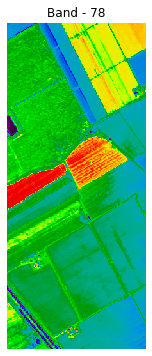

In [12]:
fig = plt.figure(figsize = (12, 6))
q = np.random.randint(x.shape[2])
plt.imshow(x[:,:,q], cmap='nipy_spectral')
plt.axis('off')
plt.title(f'Band - {q}')
plt.savefig('IP_Bands.png')

In [14]:
f = r[r['class'] != 0]

X = f.iloc[:, :-1].values

y = f.loc[:, 'class'].values 

names = ['Asphalt','Meadows','Gravel','Trees','Painted metal sheets','Bare Soil','Bitumen','Self-Blocking Bricks','Shadows']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)
svm =  SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
svm.fit(X_train, y_train)
#pickle.dump(model, open('SVM_class_model.pkl', 'wb'))
#model = pickle.load(open('SVM_class_model.pkl', 'rb'))
y_pred = svm.predict(X_test)
y_pred

array([11,  8,  2, ...,  2,  6,  5], dtype=uint8)

In [15]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12,6))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap.png', dpi=300)

ValueError: Shape of passed values is (16, 16), indices imply (9, 9)

In [37]:
print(classification_report(y_test, ypred, target_names = names))

                      precision    recall  f1-score   support

             Asphalt       0.96      0.97      0.96      1326
             Meadows       0.97      0.98      0.98      3730
              Gravel       0.92      0.82      0.87       420
               Trees       0.98      0.97      0.97       613
Painted metal sheets       1.00      1.00      1.00       269
           Bare Soil       0.95      0.92      0.93      1006
             Bitumen       0.95      0.89      0.92       266
Self-Blocking Bricks       0.89      0.93      0.91       737
             Shadows       1.00      0.99      1.00       189

            accuracy                           0.96      8556
           macro avg       0.96      0.94      0.95      8556
        weighted avg       0.96      0.96      0.96      8556



In [38]:
l=[]
for i in range(r.shape[0]):
  if r.iloc[i, -1] == 0:
    l.append(0)
  else:
    l.append(svm.predict(r.iloc[i, :-1].values.reshape(1, -1)))
l

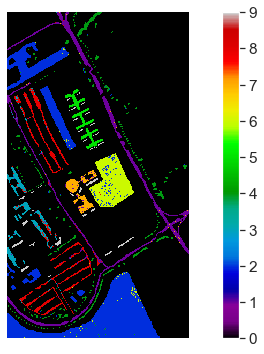

In [39]:
clmap = np.array(l).reshape(610, 340,).astype('float')
plt.figure(figsize=(12, 6))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

In [70]:
from sklearn.tree import DecisionTreeClassifier
f = r[r['class'] != 0]

X = f.iloc[:, :-1].values

y = f.loc[:, 'class'].values 
names = ['Asphalt','Meadows','Gravel','Trees','Painted metal sheets','Bare Soil','Bitumen','Self-Blocking Bricks','Shadows']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

#model = DecisionTreeClassifier()


#model = model.fit(X_train,y_train)
#pickle.dump(model, open('decision _tree_class_model.pkl', 'wb'))
model = pickle.load(open('decision _tree_class_model.pkl', 'rb'))
y_pred = model.predict(X_test)
y_pred


array([2, 4, 8, ..., 4, 2, 5], dtype=uint8)

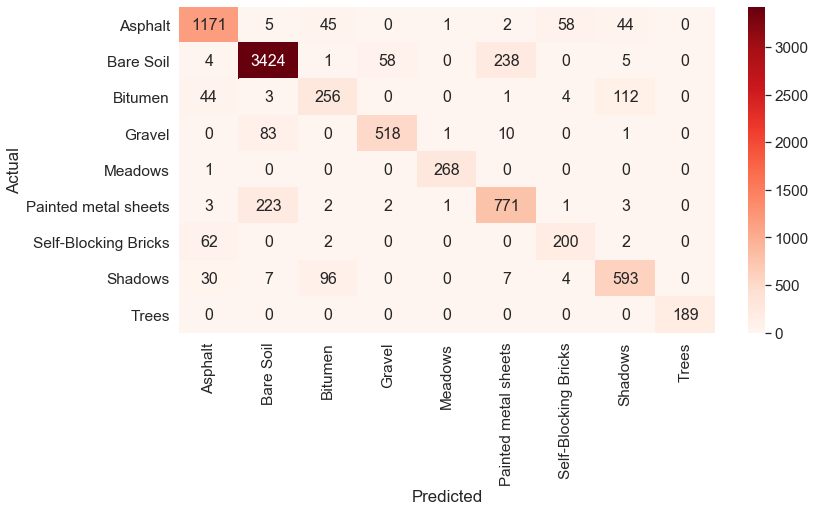

In [41]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12,6))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap2.png', dpi=300)

In [42]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8637213651238896


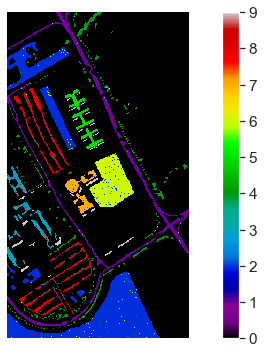

In [43]:
l2=[]
for i in range(r.shape[0]):
  if r.iloc[i, -1] == 0:
    l2.append(0)
  else:
    l2.append(model.predict(r.iloc[i, :-1].values.reshape(1, -1)))
cl2map = np.array(l2).reshape(610, 340,).astype('float')
plt.figure(figsize=(12, 6))
plt.imshow(cl2map, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap2.png')
plt.show()

In [67]:
print(classification_report(y_test, y_pred, target_names = names))


                      precision    recall  f1-score   support

             Asphalt       0.88      0.87      0.88      1326
             Meadows       0.92      0.92      0.92      3730
              Gravel       0.64      0.60      0.62       420
               Trees       0.89      0.85      0.87       613
Painted metal sheets       0.99      1.00      0.99       269
           Bare Soil       0.74      0.77      0.76      1006
             Bitumen       0.75      0.77      0.76       266
Self-Blocking Bricks       0.79      0.81      0.80       737
             Shadows       1.00      1.00      1.00       189

            accuracy                           0.86      8556
           macro avg       0.84      0.84      0.84      8556
        weighted avg       0.86      0.86      0.86      8556



In [77]:
from sklearn.neighbors import KNeighborsClassifier
f = r[r['class'] != 0]

X = f.iloc[:, :-1].values

y = f.loc[:, 'class'].values 
names = ['Asphalt','Meadows','Gravel','Trees','Painted metal sheets','Bare Soil','Bitumen','Self-Blocking Bricks','Shadows']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)


# model = KNeighborsClassifier(n_neighbors=5)

# model = model.fit(X_train,y_train)



# model = model.fit(X_train,y_train)
# pickle.dump(model, open('KNeighborsClassifier_class_model.pkl', 'wb'))
model = pickle.load(open('KNeighborsClassifier_class_model.pkl', 'rb'))


y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
y_pred

Accuracy: 0.904043945769051


array([2, 4, 8, ..., 4, 2, 5], dtype=uint8)

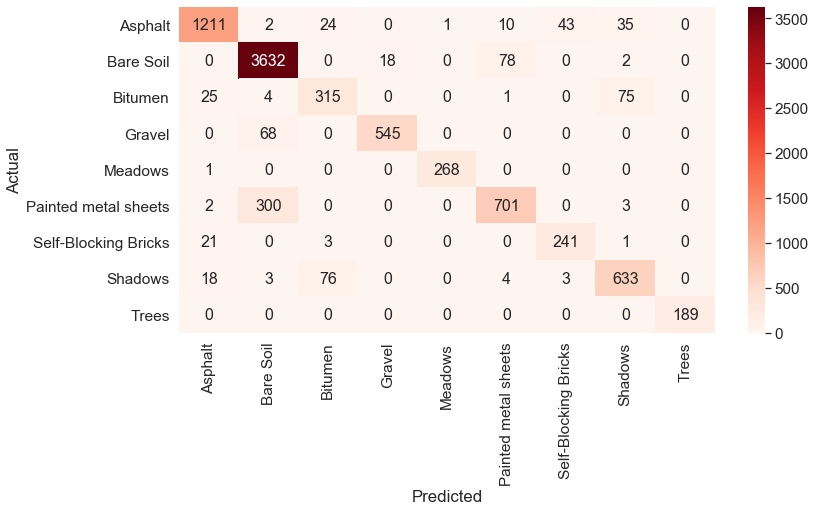

In [46]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12,6))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap5.png', dpi=300)

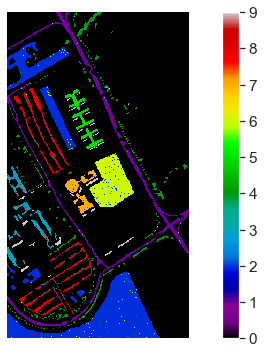

In [47]:
l3=[]
for i in range(r.shape[0]):
  if r.iloc[i, -1] == 0:
    l3.append(0)
  else:
    l3.append(model.predict(r.iloc[i, :-1].values.reshape(1, -1)))
cl3map = np.array(l2).reshape(610, 340,).astype('float')
plt.figure(figsize=(12, 6))
plt.imshow(cl3map, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap3.png')
plt.show()

In [61]:
print(classification_report(y_test, y_pred, target_names = names))

                      precision    recall  f1-score   support

             Asphalt       0.88      0.87      0.88      1326
             Meadows       0.92      0.92      0.92      3730
              Gravel       0.64      0.60      0.62       420
               Trees       0.89      0.85      0.87       613
Painted metal sheets       0.99      1.00      0.99       269
           Bare Soil       0.74      0.77      0.76      1006
             Bitumen       0.75      0.77      0.76       266
Self-Blocking Bricks       0.79      0.81      0.80       737
             Shadows       1.00      1.00      1.00       189

            accuracy                           0.86      8556
           macro avg       0.84      0.84      0.84      8556
        weighted avg       0.86      0.86      0.86      8556



In [78]:
from sklearn.ensemble import RandomForestClassifier
f = r[r['class'] != 0]

X = f.iloc[:, :-1].values

y = f.loc[:, 'class'].values 
names = ['Asphalt','Meadows','Gravel','Trees','Painted metal sheets','Bare Soil','Bitumen','Self-Blocking Bricks','Shadows']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)



model3=RandomForestClassifier(n_estimators=100)

model3.fit(X_train,y_train)
pickle.dump(model, open('RandomForestClassifier_class_model.pkl', 'wb'))
#model = pickle.load(open('RandomForestClassifier_class_model.pkl', 'rb'))
# y_pred=model3.predict(X_test)
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

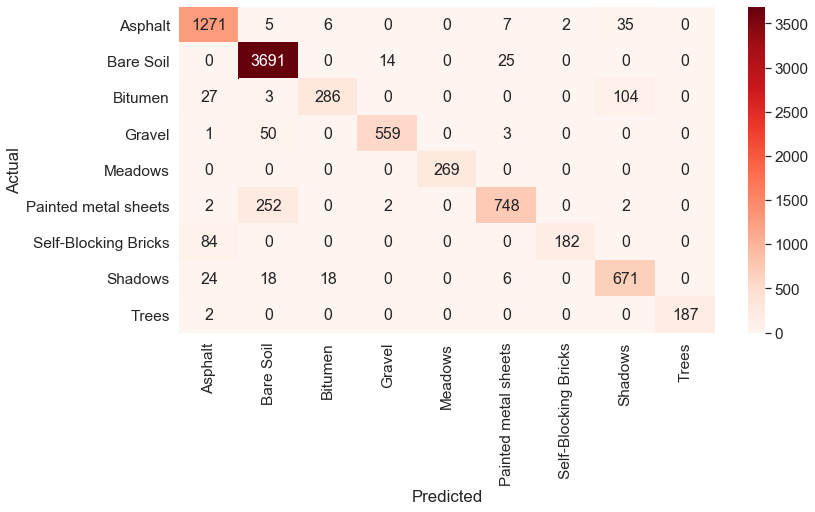

In [49]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (12,6))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')
plt.savefig('cmap6.png', dpi=300)

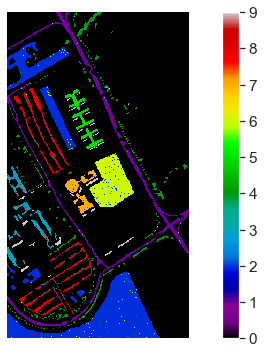

In [50]:
l4=[]
for i in range(r.shape[0]):
  if r.iloc[i, -1] == 0:
    l4.append(0)
  else:
    l4.append(model3.predict(r.iloc[i, :-1].values.reshape(1, -1)))
cl4map = np.array(l2).reshape(610, 340).astype('float')
plt.figure(figsize=(12, 6))
plt.imshow(cl4map, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap4.png')
plt.show()

In [62]:
print(classification_report(y_test, y_pred, target_names = names))

                      precision    recall  f1-score   support

             Asphalt       0.88      0.87      0.88      1326
             Meadows       0.92      0.92      0.92      3730
              Gravel       0.64      0.60      0.62       420
               Trees       0.89      0.85      0.87       613
Painted metal sheets       0.99      1.00      0.99       269
           Bare Soil       0.74      0.77      0.76      1006
             Bitumen       0.75      0.77      0.76       266
Self-Blocking Bricks       0.79      0.81      0.80       737
             Shadows       1.00      1.00      1.00       189

            accuracy                           0.86      8556
           macro avg       0.84      0.84      0.84      8556
        weighted avg       0.86      0.86      0.86      8556

